In [20]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
df = pd.read_csv(r"cctv_ecommerce_dataset.csv")

Sentiment Analysis with VADER

For 5 categories: Negative, Mixed Negative, Neutral, Mixed Positive, Positive

In [22]:
sia = SentimentIntensityAnalyzer()

In [23]:
df.columns

Index(['Cust_id', 'Cust_name', 'Cust_age', 'Cust_gender', 'City', 'State',
       'Pin_code', 'Order_id', 'Qty', 'Discount_amt', 'Delivery_fees', 'Total',
       'Order_date', 'Delivery_date', 'Delivery_status', 'Shipping_Partner',
       'Cust_review'],
      dtype='object')

In [24]:
def get_polarity_scores(text):
    return sia.polarity_scores(str(text))['compound']

df['polarity_score'] = df['Cust_review'].apply(get_polarity_scores)

In [25]:
df.sample(5)[['Order_id','polarity_score']]

,Order_id,polarity_score
4044,5226,0.6249
2801,5959,0.0000
1168,5999,-0.2960
3831,7333,0.4404
3278,7307,0.0000


In [26]:
print("Max Score", df['polarity_score'].max())
print("Min Score", df['polarity_score'].min())

Max Score 0.8047
Min Score -0.6369


In [27]:
#Generate 5 evenly spaced numbers/bins
import numpy as np
min_score = df['polarity_score'].min()
max_score = df['polarity_score'].max()
bins = np.linspace(min_score, max_score, 6)
bins

array([-0.6369 , -0.34858, -0.06026,  0.22806,  0.51638,  0.8047 ])

In [29]:
def cat_senti(text):
    score = sia.polarity_scores(str(text))['compound']
    if 0.5164 <= score <= 0.8047:
        return 'Positive'
    elif 0.2281 <= score < 0.5164:
        return 'Mixed Positive'
    elif -0.0603 <= score < 0.2281:
        return 'Neutral'
    elif -0.3486 <= score < -0.0603:
        return 'Mixed Negative'
    else:  # score < -0.3486
        return 'Negative'

df['Sentiment'] = df['Cust_review'].apply(cat_senti)

In [30]:
df.sample(5)[['Order_id','Cust_review','Sentiment']]

,Order_id,Cust_review,Sentiment
706,5483,Delivery was delayed but the product is fine.,Neutral
3332,5681,Excellent quality and fast service.,Positive
2814,6561,Highly recommend this product and seller.,Mixed Positive
1415,7688,"Product as described, no issues at all.",Mixed Negative
2993,3580,Great experience from order to delivery.,Positive


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
sent2 = df.groupby(['Sentiment']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
sent2

,Sentiment,Count
4,Positive,2508
1,Mixed Positive,1116
3,Neutral,367
0,Mixed Negative,298
2,Negative,67


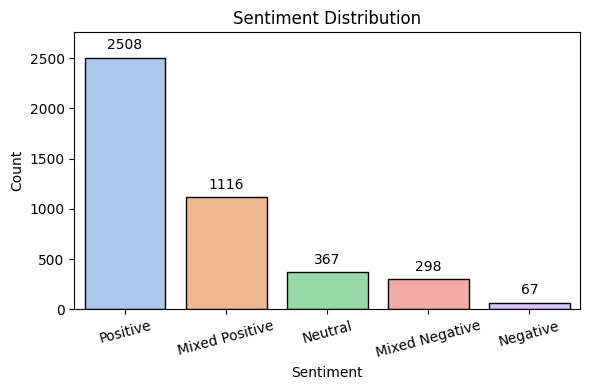

In [33]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(6,4)) 
ax = sns.barplot(data=sent2, x='Sentiment', y='Count', palette='pastel', edgecolor='black')

plt.xticks(rotation=15, ha='center')


for bars in ax.containers:
    ax.bar_label(bars, padding=4)

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

max_count = sent2['Count'].max()
plt.ylim(0, max_count + max_count * 0.1)

plt.tight_layout()
plt.show()

In [34]:
df[['Order_id', 'Cust_review','Sentiment']].to_csv('Customer_Feedback_Analysis.csv', index =False)